In [4]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

read_path = r'C:\Users\XeniaRieger\OneDrive - bwedu\Dokumente\Studium Master\1. Semester\Data Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [150]:
# 2003: january, february, march, april -> Irakkrieg
filtered_values = np.where((df["date"].dt.year <= 2003))
data_war = df.loc[filtered_values]
data_before_war = data_war.loc[data_war["date"].dt.year <= 2002]

In [ ]:
# regression for each party
x = data_war.index.values.reshape(-1,1)
pred = LinearRegression()
pred.fit(x, data_war[["SPD"]])

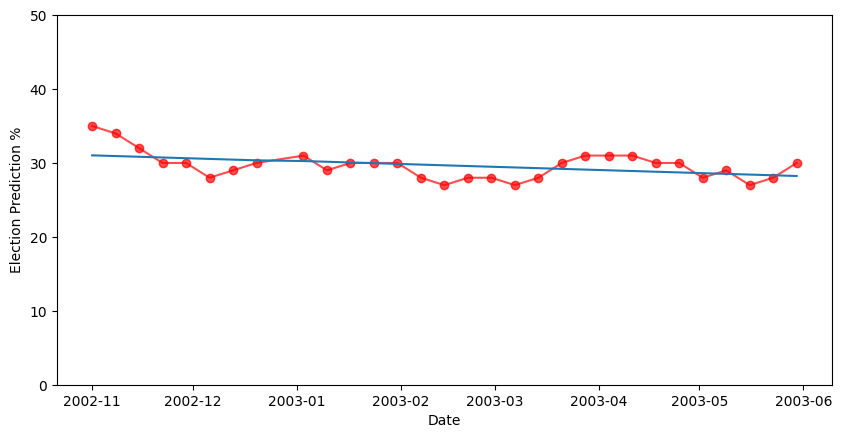

In [44]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war[['date']],pred.predict(x))

In [153]:
# line not fitted well -> polynomial regression
# regression for each party
x_poly = data_before_war.index.values
poly = PolynomialFeatures(degree=1)
poly_features = poly.fit_transform(x_poly.reshape(-1, 1))
poly_features_future = poly.fit_transform(data_war.index.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data_before_war[["SPD"]])

LinearRegression()

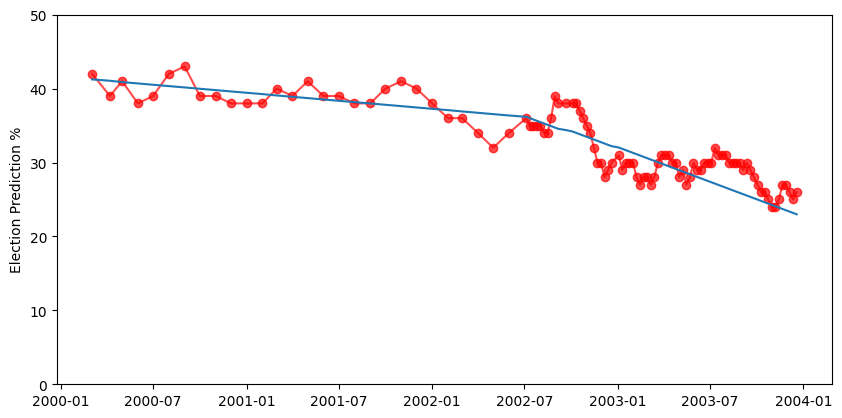

In [155]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
ax1.set_ylim(0, 50)
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war[['date']],poly_reg_model.predict(poly_features_future))

In [156]:
# 2022: all year -> verschiedene Konflikte, Russland und Ukraine
# 2023: all year -> verschiedene Konflikte, Russland und Ukraine
filtered_values = np.where((df["date"].dt.year <= 2022))
data_war = df.loc[filtered_values]
data_before_war = data_war.loc[data_war["date"].dt.year <= 2021]

In [163]:
# regression for each party
x_poly = data_before_war.index.values
poly = PolynomialFeatures(degree=5)
poly_features = poly.fit_transform(x_poly.reshape(-1, 1))
poly_features_future = poly.fit_transform(data_war.index.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data_before_war[["SPD"]])

LinearRegression()

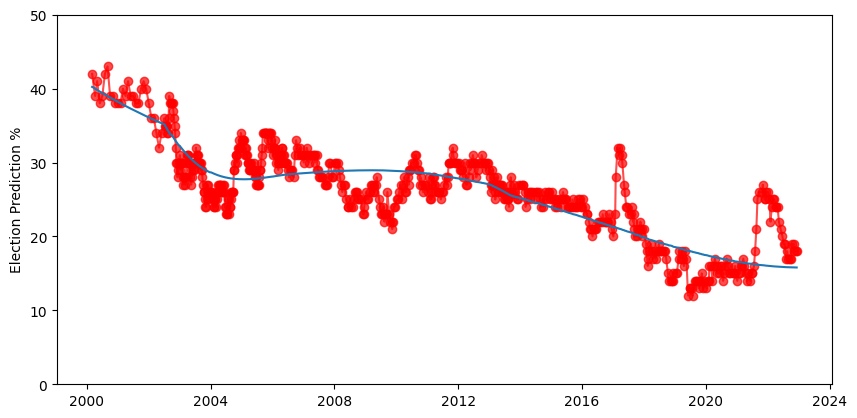

In [164]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
ax1.set_ylim(0, 50)
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war[['date']],poly_reg_model.predict(poly_features_future))